In [1]:
import ROOT as r
import json

Welcome to JupyROOT 6.24/07


In [2]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

f = r.TFile.Open(testFileName)
tree = f.Get("Events")

Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available


In [13]:
hist = r.TH2F("Histogram","",50,0,2000,50,1500,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    with open("cuts.json", "r") as cuts:
        cuts_dict = json.load(cuts)
                        
    cuts_list = list(cuts_dict.values())
                    
    cut_pts = cuts_list[0]
    cut_etas = cuts_list[1]
    cut_masses_min = cuts_list[2]
    cut_masses_max = cuts_list[3]
    
    

    jet0Flag = pts[0]>cut_pts and abs(etas[0])<cut_etas  and masses[0]>cut_masses_min and masses[0]<cut_masses_max
    jet1Flag = pts[1]>cut_pts and abs(etas[1])<cut_etas  and masses[1]>cut_masses_min and masses[1]<cut_masses_max
    jet2Flag = pts[2]>cut_pts and abs(etas[2])<cut_etas  and masses[2]>cut_masses_min and masses[2]<cut_masses_max

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet12 = jet1 + jet2
    trijet = jet1 + jet2 + jet0
    
    #print(jet12, trijet)
    hist.Fill(  jet12.M(), trijet.M())
    
    

Warning in <TFile::Append>: Replacing existing TH1: Histogram (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file 2D_hist_50binova.png has been created


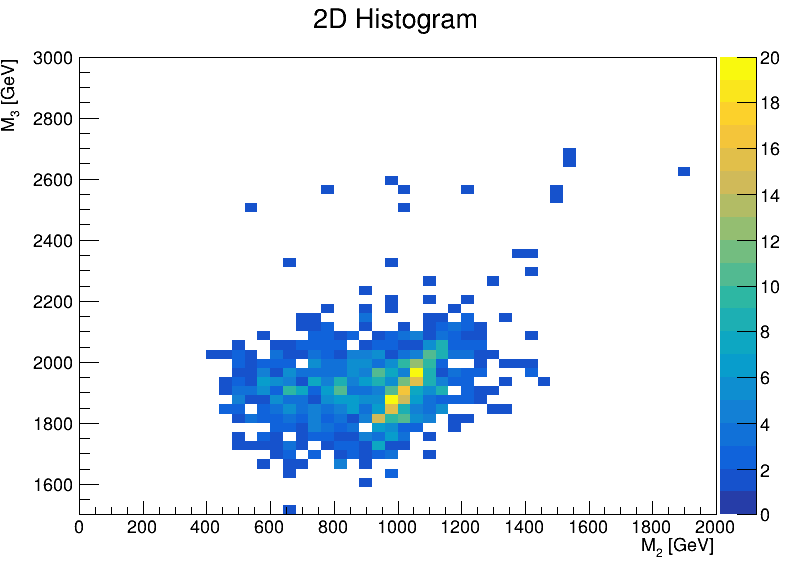

In [14]:
r.gStyle.SetOptStat(0000)
c = r.TCanvas("c","",800,600)
hist.GetXaxis().SetTitle("M_{2} [GeV]")
hist.GetYaxis().SetTitle("M_{3} [GeV]")
hist.SetTitle("2D Histogram")
hist.Draw("colz")
c.Draw()
c.SaveAs("2D_hist_50binova.png")

In [ ]:
jet0Masses = r.TH2F("jet0m","",300,0,3000)
jet1Masses = r.TH2F("jet1m","",300,0,3000)
jet2Masses = r.TH2F("jet2m","",300,0,3000)
trijetMasses = r.TH2F("jet2m","",300,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    with open("cuts.json", "r") as cuts:
        cuts_dict = json.load(cuts)
                        
    cuts_list = list(cuts_dict.values())
                    
    cut_pts = cuts_list[0]
    cut_etas = cuts_list[1]
    cut_masses_min = cuts_list[2]
    cut_masses_max = cuts_list[3]
    
    

    jet0Flag = pts[0]>cut_pts and abs(etas[0])<cut_etas  and masses[0]>cut_masses_min and masses[0]<cut_masses_max
    jet1Flag = pts[1]>cut_pts and abs(etas[1])<cut_etas  and masses[1]>cut_masses_min and masses[1]<cut_masses_max
    jet2Flag = pts[2]>cut_pts and abs(etas[2])<cut_etas  and masses[2]>cut_masses_min and masses[2]<cut_masses_max

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet0Masses.Fill(jet0.M())
    jet1Masses.Fill(jet1.M())
    jet2Masses.Fill(jet2.M())